In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import gmean
import pprint
import pybedtools
%matplotlib inline

In [2]:
def show_performace(input_directory, report_k_step, max_step=-1):
    train_loss = pd.read_csv(input_directory+'selene_sdk.train_model.train.txt')
    val_loss = pd.read_csv(input_directory+'selene_sdk.train_model.validation.txt', sep='\t')

    f = plt.figure(figsize=(9,9))
    ax1 = f.add_subplot(2, 1, 1)
    ax1.plot(((np.arange(len(train_loss))+1)*report_k_step)[:max_step], train_loss['loss'][:max_step], label='train')
    ax1.plot(((np.arange(len(val_loss))+1)*report_k_step)[:max_step], val_loss['loss'][:max_step], label='val')
    ax1.legend()
    ax1.set_ylabel('loss')
    ax1.set_xlabel('k step')

    ax2 = f.add_subplot(2, 1, 2)
    ax2.plot((np.arange(len(train_loss))+1)*report_k_step, val_loss['average_precision'], label='aupr')
    ax2.plot((np.arange(len(val_loss))+1)*report_k_step, val_loss['roc_auc'], label='auroc')
    ax2.legend()
    ax2.set_xlabel('k step')
    ax2.set_ylabel('area under')
    f.tight_layout()
    
    print(f"val_los roc_auc max = {val_loss['roc_auc'].max()}")
    print(f"val_los average_precision max = {val_loss['average_precision'].max()}")
    print(f"lowest val loss point {val_loss[val_loss['loss'] == val_loss['loss'].min()]}")
    print(val_loss)

In [3]:
def show_regression_performace(input_directory, report_k_step):
    train_loss = pd.read_csv(input_directory+'selene_sdk.train_model.train.txt')
    val_loss = pd.read_csv(input_directory+'selene_sdk.train_model.validation.txt', sep='\t')

    f = plt.figure(figsize=(9,9))
    ax1 = f.add_subplot(2, 1, 1)
    ax1.plot((np.arange(len(train_loss))+1)*report_k_step, train_loss['loss'], label='train')
    ax1.plot((np.arange(len(val_loss))+1)*report_k_step, val_loss['loss'], label='val')
    ax1.plot((np.arange(len(val_loss))+1)*report_k_step, val_loss['r2'], label=' r2')
    ax1.legend()
    ax1.set_ylabel('loss')
    ax1.set_xlabel('k step')

    f.tight_layout()
    
    print(f"val_los r2 max = {val_loss['r2'].max()}")
    print(f"lowest val loss point {val_loss[val_loss['loss'] == val_loss['loss'].min()]}")
    print(val_loss)

### 1. 499bp

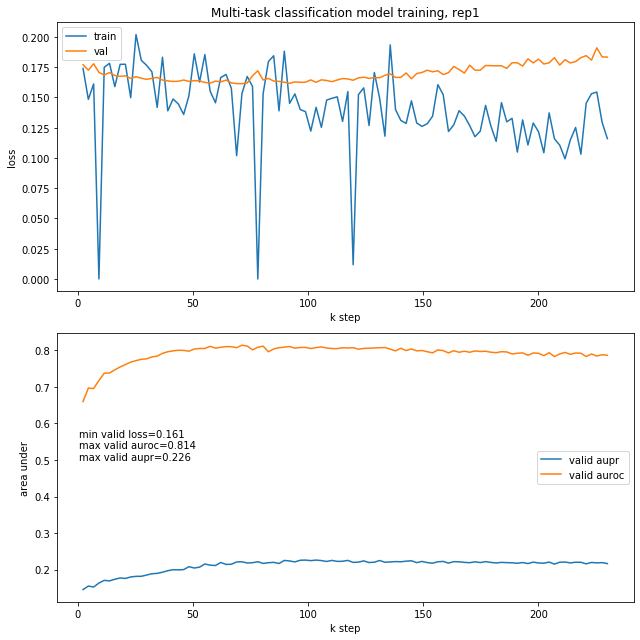

In [84]:
input_directory='./starr_sig_A549_499bp/training_outputs/transfer_trained/'
report_k_step = 2.3
max_step=100
train_loss = pd.read_csv(input_directory+'selene_sdk.train_model.train.txt')
val_loss = pd.read_csv(input_directory+'selene_sdk.train_model.validation.txt', sep='\t')

f = plt.figure(figsize=(9,9))
ax1 = f.add_subplot(2, 1, 1)
ax1.plot(((np.arange(len(train_loss))+1)*report_k_step)[:max_step], train_loss['loss'][:max_step], label='train')
ax1.plot(((np.arange(len(val_loss))+1)*report_k_step)[:max_step], val_loss['loss'][:max_step], label='val')
ax1.legend()
ax1.set_ylabel('loss')
ax1.set_xlabel('k step')
ax1.set_title('Multi-task classification model training, rep1')

ax2 = f.add_subplot(2, 1, 2)
ax2.plot(((np.arange(len(train_loss))+1)*report_k_step)[:max_step], val_loss['average_precision'][:max_step], label='valid aupr')
ax2.plot(((np.arange(len(val_loss))+1)*report_k_step)[:max_step], val_loss['roc_auc'][:max_step], label='valid auroc')
ax2.legend()
ax2.set_xlabel('k step')
ax2.set_ylabel('area under')
ax2.text(0.5, 0.5, f"min valid loss={round(val_loss['loss'].min(), 3)}\nmax valid auroc={round(val_loss['roc_auc'].max(), 3)}\nmax valid aupr={round(val_loss['average_precision'].max(),3)}")
f.tight_layout()
f.savefig('./figures/multi_task_clf_train_rep1.png')

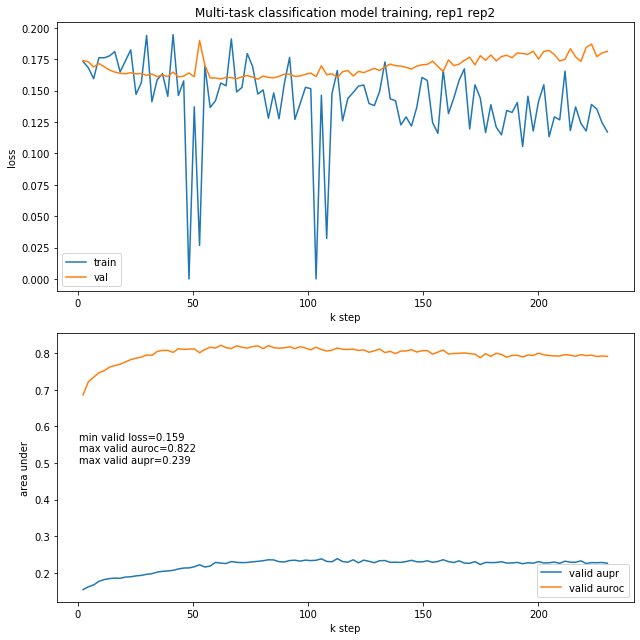

In [83]:
input_directory='./starr_sig_A549_499bp/training_outputs/transfer_trained_rep1rep2/'
report_k_step = 2.3
max_step=100
train_loss = pd.read_csv(input_directory+'selene_sdk.train_model.train.txt')
val_loss = pd.read_csv(input_directory+'selene_sdk.train_model.validation.txt', sep='\t')

f = plt.figure(figsize=(9,9))
ax1 = f.add_subplot(2, 1, 1)
ax1.plot(((np.arange(len(train_loss))+1)*report_k_step)[:max_step], train_loss['loss'][:max_step], label='train')
ax1.plot(((np.arange(len(val_loss))+1)*report_k_step)[:max_step], val_loss['loss'][:max_step], label='val')
ax1.legend()
ax1.set_ylabel('loss')
ax1.set_xlabel('k step')
ax1.set_title('Multi-task classification model training, rep1 rep2')

ax2 = f.add_subplot(2, 1, 2)
ax2.plot(((np.arange(len(train_loss))+1)*report_k_step)[:max_step], val_loss['average_precision'][:max_step], label='valid aupr')
ax2.plot(((np.arange(len(val_loss))+1)*report_k_step)[:max_step], val_loss['roc_auc'][:max_step], label='valid auroc')
ax2.legend()
ax2.set_xlabel('k step')
ax2.set_ylabel('area under')
ax2.text(0.5, 0.5, f"min valid loss={round(val_loss['loss'].min(), 3)}\nmax valid auroc={round(val_loss['roc_auc'].max(), 3)}\nmax valid aupr={round(val_loss['average_precision'].max(),3)}")
f.tight_layout()
f.savefig('./figures/multi_task_clf_train_rep1rep2.png')

### 2. 499bp regression

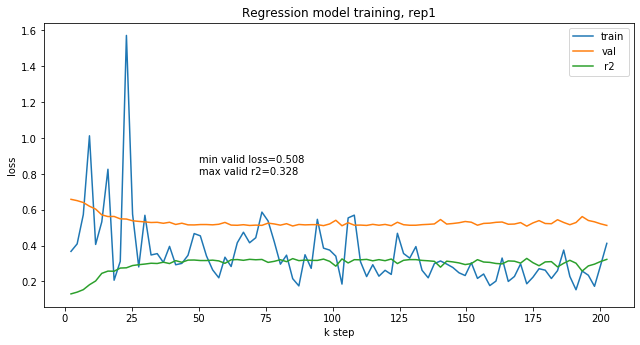

In [105]:
input_directory='./starr_sig_A549_499bp_regression/training_outputs/transfer_trained/'
report_k_step = 2.3
max_step = 100
train_loss = pd.read_csv(input_directory+'selene_sdk.train_model.train.txt')
val_loss = pd.read_csv(input_directory+'selene_sdk.train_model.validation.txt', sep='\t')

f = plt.figure(figsize=(9,9))
ax1 = f.add_subplot(2, 1, 1)
ax1.plot(((np.arange(len(train_loss))+1)*report_k_step)[:max_step], train_loss['loss'][:max_step], label='train')
ax1.plot(((np.arange(len(val_loss))+1)*report_k_step)[:max_step], val_loss['loss'][:max_step], label='val')
ax1.plot(((np.arange(len(val_loss))+1)*report_k_step)[:max_step], val_loss['r2'][:max_step], label=' r2')
ax1.legend()
ax1.set_ylabel('loss')
ax1.set_xlabel('k step')
ax1.set_title('Regression model training, rep1')
ax1.text(50, 0.8, f"min valid loss={round(val_loss['loss'].min(), 3)}\nmax valid r2={round(val_loss['r2'].max(), 3)}")
f.tight_layout()
f.savefig('./figures/regression_train_rep1.png')

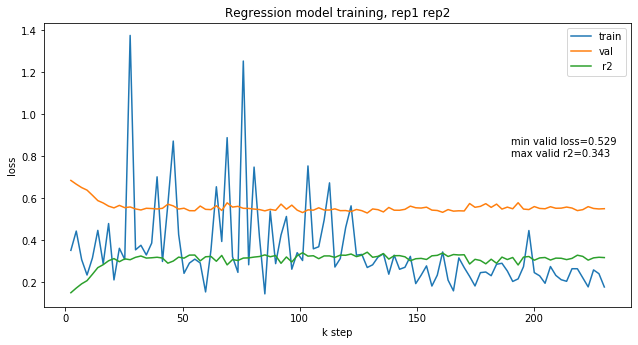

In [98]:
input_directory='./starr_sig_A549_499bp_regression/training_outputs/transfer_trained_rep1rep2/'
report_k_step = 2.3
max_step = 100
train_loss = pd.read_csv(input_directory+'selene_sdk.train_model.train.txt')
val_loss = pd.read_csv(input_directory+'selene_sdk.train_model.validation.txt', sep='\t')

f = plt.figure(figsize=(9,9))
ax1 = f.add_subplot(2, 1, 1)
ax1.plot(((np.arange(len(train_loss))+1)*report_k_step)[:max_step], train_loss['loss'][:max_step], label='train')
ax1.plot(((np.arange(len(val_loss))+1)*report_k_step)[:max_step], val_loss['loss'][:max_step], label='val')
ax1.plot(((np.arange(len(val_loss))+1)*report_k_step)[:max_step], val_loss['r2'][:max_step], label=' r2')
ax1.legend()
ax1.set_ylabel('loss')
ax1.set_xlabel('k step')
ax1.set_title('Regression model training, rep1 rep2')
ax1.text(190, 0.8, f"min valid loss={round(val_loss['loss'].min(), 3)}\nmax valid r2={round(val_loss['r2'].max(), 3)}")
f.tight_layout()
f.savefig('./figures/regression_train_rep1rep2.png')

### 3. Visualize seqs

In [3]:
from modisco.visualization import viz_sequence
import h5py
from collections import OrderedDict
import numpy as np
from Bio import SeqIO
from Bio import motifs
from Bio.Seq import Seq
import pandas as pd
import pybedtools

In [4]:
f = h5py.File('../interpret_models/output_data/starr_sig_A549_499bp_rep1rep2_regression.h5', 'r')

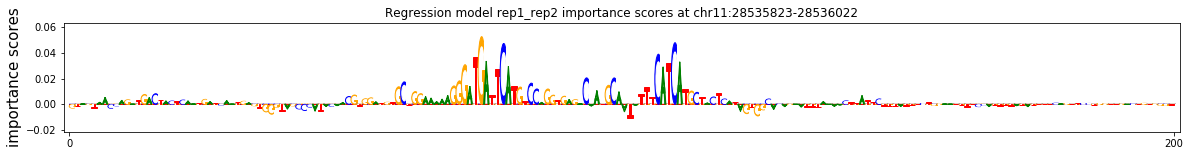

In [8]:
seq_num = 1934
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111) 
viz_sequence.plot_weights_given_ax(ax=ax, array=f['contrib_scores']['task0'][seq_num][200:400])
ax.set_title('Regression model rep1_rep2 importance scores at chr11:28535823-28536022')
ax.set_xticks((0, 200))
ax.set_ylabel('importance scores')
ax.figure.savefig('../transfer_learn_deepsea/figures/regression_importance_score.png')